# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [664]:
import pandas as pd
df = pd.read_csv('data/weedprices01012015.csv')
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [665]:
# 1.
df = pd.read_csv('data/weedprices01012015.csv', na_values='I feel bad for these guys -->')
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


In [666]:
# 2.
import numpy as np
df['LowQ'].replace('I feel bad for these guys -->', np.nan, inplace=True)
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

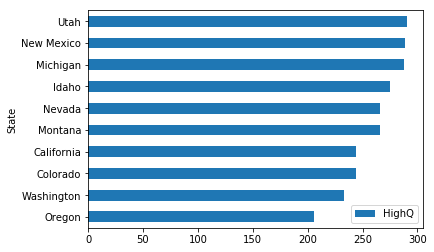

In [667]:
%matplotlib inline

# 1.
df.sort_values(by='HighQ').head(10).plot(kind='barh', y='HighQ', x='State')

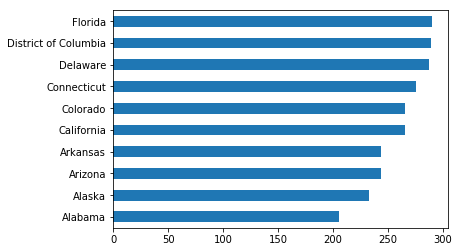

In [668]:
# 2.
graph = df['HighQ'].nsmallest(10).plot(kind='barh')
graph.set_yticklabels(df['State'])

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

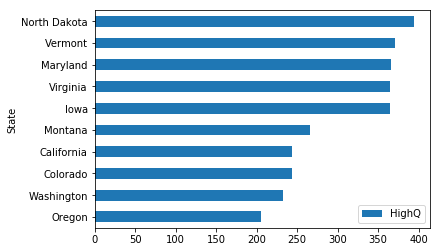

In [669]:
(pd.concat([
    df.sort_values(by='HighQ').head(5),
    df.sort_values(by='HighQ').tail(5)], ignore_index=True)
 .plot(kind='barh', x='State', y='HighQ'))

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

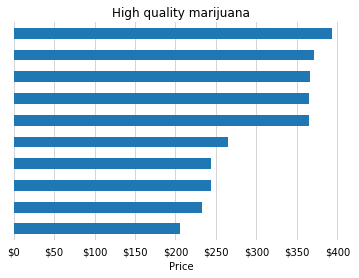

In [670]:
import matplotlib.ticker as ticker
ax = (pd.concat([
    df.sort_values(by='HighQ').head(5),
    df.sort_values(by='HighQ').tail(5)], ignore_index=True)
      .plot(kind='barh', x='State', y='HighQ'))
ax.set_title("High quality marijuana")
ax.set_xlabel("Price")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax.yaxis.set_ticks([])
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off
ax.legend_.remove()
ax.grid(color='#d4d5d6', linestyle='-', linewidth=1)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [671]:
import glob

In [672]:
filenames = glob.glob('data/*.csv')
len(filenames)

491

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [673]:
price_dfs = [pd.read_csv(csv, na_values='I feel bad for these guys -->') for csv in filenames]

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [674]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [675]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [676]:
# 1.
for index, filename in enumerate(filenames):
    price_dfs[index]['filename'] = filename

In [744]:
# 2.
for f, p in zip(filenames, price_dfs):
    p['filename'] = f

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [678]:
df = pd.concat([df for df in price_dfs])

In [679]:
df.shape

(24990, 8)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [680]:
import re

dates = df['filename'].str.extract('(\d\d)(\d\d)(\d\d\d\d)')
dates

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2
0,01,01,2014
1,01,01,2014
2,01,01,2014
3,01,01,2014
4,01,01,2014
5,01,01,2014
6,01,01,2014
7,01,01,2014
8,01,01,2014
9,01,01,2014


## Okay, now add all three columns back at once

You should rename the columns first!

In [689]:
dates.columns = ['day', 'month', 'year']
df = pd.concat([dates, df], axis=1)

## Plot the change in marijuana prices in Oregon over time

In [690]:
df.head()

,day,month,year,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,01,01,2014,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,01,01,2014,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv
2,01,01,2014,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv
3,01,01,2014,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv
4,01,01,2014,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv


In [691]:
df.replace('\$', '', inplace=True, regex=True)

In [703]:
df['HighQ'] = df['HighQ'].astype(float)

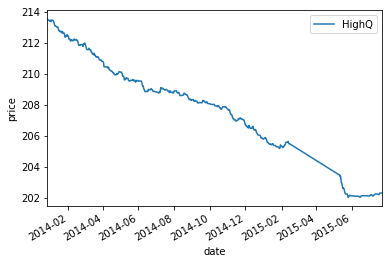

In [741]:
import time
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df[df['State'] == 'Oregon'].plot(x='date', y='HighQ').set_ylabel('price')

## Plot the change in marijuana prices in all states over time

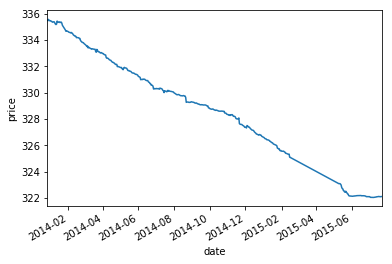

In [740]:
df.groupby('date')['HighQ'].mean().plot().set_ylabel('price')